In [1]:
from astropy.io import fits
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import torch
import sklearn.decomposition
import seaborn as sn
import pickle
if("Practice" in os.getcwd()):
    os.chdir("../Data_handling")

from gmmflow import TorchGaussMixture

from RealNVP import FlowGMM
from gaia_query import gaia_cone, bailer_jones_cone, concatenate_gaia_bailer
from vae import Encoder,Decoder, VAE , loss_function, model_train
from sp_vae import ModelVAE,model_trains
from gmm_torch import GaussianMixture

os.chdir('../Practice')
# I will need to do batch normalisation


Mask tensor

In [2]:
r = 3.5
means = torch.tensor([[-r, -r], [r, r]])

In [3]:
n_samples = 10000
batch_size=10000
epochs=500

from torch.utils.data import DataLoader
# Define distribution. 
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X= noisy_moons[0]
y=torch.tensor(noisy_moons[1],requires_grad=False).float()
X = StandardScaler().fit_transform(X)

X=torch.hstack((torch.tensor(X).float(),y.reshape((X.shape[0],1))))






In [4]:
X.shape

torch.Size([10000, 3])

In [5]:

X=DataLoader(X,batch_size=batch_size,drop_last=True) 

model = FlowGMM(layers=3,n_features=noisy_moons[0].shape[-1],mixture_components=2,hidden_dims=[50,150],d=1,means=means,unlabelled=0.5)

# Training hyperparameters.
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


TypeError: __init__() got an unexpected keyword argument 'unlabelled'

In [ ]:
plot_loss=[]
plotll=[]
plotdet=[]
# Iterate over the number of iterations.
model.train()

for epoch in range(epochs):    
        overall_loss = 0
        for batch_idx, x in enumerate(X):

            x = x.view(batch_size, len(x[0]))
            #x = x.to(DEVICE)
            
            optimizer.zero_grad()

            y,gmm,loss,ll,det = model(x)

            
            
            overall_loss += loss.item()
            
            loss.backward()
            optimizer.step()
            
        plot_loss.append(loss)   
        plotll.append(ll)  
        plotdet.append(det)   
        #print("\tEpoch", epoch + 1, "complete!", "\tAverage Loss: ", overall_loss / (batch_idx*batch_size))
    
        print("Overall Loss: ", overall_loss)
    
print("Finish!!")


torch.Size([10000])
Overall Loss:  31.352161407470703
torch.Size([10000])


/Users/mattocallaghan/GES/Data_handling/gmmflow.py:47: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  mixture_log_probs = torch.logsumexp(all_log_probs + torch.log(F.softmax(self.weights)), dim=1)


Overall Loss:  31.249818801879883
torch.Size([10000])
Overall Loss:  31.14794921875
torch.Size([10000])
Overall Loss:  31.046546936035156
torch.Size([10000])
Overall Loss:  30.945573806762695
torch.Size([10000])
Overall Loss:  30.845090866088867
torch.Size([10000])
Overall Loss:  30.74510955810547
torch.Size([10000])
Overall Loss:  30.64566993713379
torch.Size([10000])
Overall Loss:  30.546783447265625
torch.Size([10000])
Overall Loss:  30.448442459106445
torch.Size([10000])
Overall Loss:  30.350618362426758
torch.Size([10000])
Overall Loss:  30.253313064575195
torch.Size([10000])
Overall Loss:  30.15646743774414
torch.Size([10000])
Overall Loss:  30.06009292602539
torch.Size([10000])
Overall Loss:  29.964237213134766
torch.Size([10000])
Overall Loss:  29.868873596191406
torch.Size([10000])
Overall Loss:  29.773956298828125
torch.Size([10000])
Overall Loss:  29.679546356201172
torch.Size([10000])
Overall Loss:  29.58563995361328
torch.Size([10000])
Overall Loss:  29.492324829101562
tor

In [ ]:
model.eval()

FlowGMM(
  (s_net): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=1, out_features=50, bias=True)
      (1): ReLU()
      (2): Linear(in_features=50, out_features=150, bias=True)
      (3): ReLU()
      (4): Linear(in_features=150, out_features=1, bias=True)
    )
    (1): Sequential(
      (0): Linear(in_features=1, out_features=50, bias=True)
      (1): ReLU()
      (2): Linear(in_features=50, out_features=150, bias=True)
      (3): ReLU()
      (4): Linear(in_features=150, out_features=1, bias=True)
    )
    (2): Sequential(
      (0): Linear(in_features=1, out_features=50, bias=True)
      (1): ReLU()
      (2): Linear(in_features=50, out_features=150, bias=True)
      (3): ReLU()
      (4): Linear(in_features=150, out_features=1, bias=True)
    )
  )
  (t_net): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=1, out_features=50, bias=True)
      (1): ReLU()
      (2): Linear(in_features=50, out_features=150, bias=True)
      (3): ReLU()
      (4): Li

In [ ]:
for i in range(len(plot_loss)):
    plot_loss[i]=plot_loss[i].detach().numpy()
    plotll[i]=plotll[i].detach().numpy()
    plotdet[i]=plotdet[i].detach().numpy()

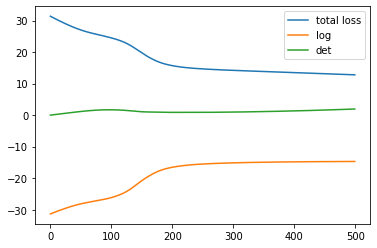

In [ ]:
import matplotlib.pyplot as plt
plt.plot(plot_loss,label='total loss')
plt.plot(plotll, label='log')
plt.plot(plotdet,label='det')
plt.legend()


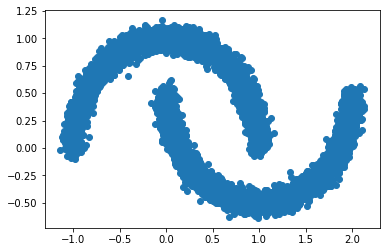

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(noisy_moons[0].transpose()[0],noisy_moons[0].transpose()[1])

In [ ]:
torch.tensor(noisy_moons[0])

tensor([[ 0.6635, -0.5234],
        [ 0.9989,  0.1024],
        [-0.3206,  0.8840],
        ...,
        [-0.6958,  0.7445],
        [-0.7904,  0.6847],
        [ 1.0763, -0.5580]], dtype=torch.float64)

In [ ]:
x= torch.tensor(noisy_moons[0]).float()
y= torch.tensor(noisy_moons[1]).float()
x=torch.hstack((x,y.reshape((x.shape[0],1))))
y,gmm,loss,_,_=model(x)

torch.Size([10000])


In [ ]:
probs=gmm.class_probs(y)

/Users/mattocallaghan/GES/Data_handling/gmmflow.py:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  log_probs_weighted = log_probs + torch.log(F.softmax(self.weights))


In [ ]:
probs[0]

tensor([2.0894e-13, 1.0000e+00], grad_fn=<SelectBackward0>)

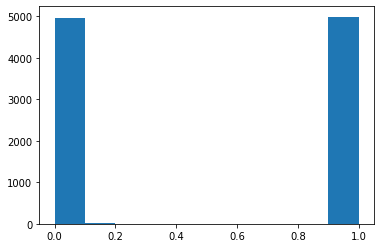

In [ ]:
plt.hist(probs.detach().numpy().transpose()[0])
plt.show()

In [ ]:
probs.detach().numpy().transpose()[0,np.newaxis]

array([[2.0894111e-13, 9.9999630e-01, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.8821826e-13]], dtype=float32)

In [ ]:
probs.detach().numpy().transpose()[0].shape

(10000,)

In [ ]:
import pandas as pd
noisy_moons=x.detach().numpy()
probs.detach().numpy().transpose()[0]
final=np.concatenate((noisy_moons,probs.detach().numpy(),y.detach().numpy()),axis=-1)

In [ ]:
plot_df=pd.DataFrame(data=final,columns=['x','y','label','p1','p2','y1','y2'])

<AxesSubplot:xlabel='x', ylabel='y'>

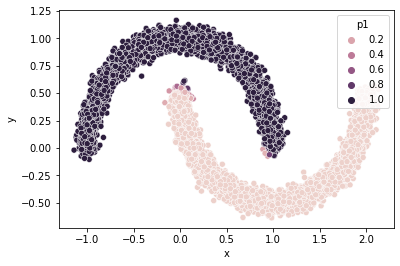

In [ ]:
import seaborn as sns
sns.scatterplot(data=plot_df,x='x',y='y',hue='p1')

<AxesSubplot:xlabel='y1', ylabel='y2'>

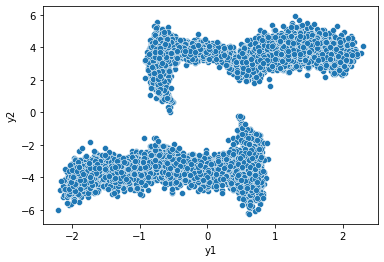

In [ ]:
sns.scatterplot(data=plot_df,x='y1',y='y2')